<a href="https://colab.research.google.com/github/Ikeoluwa-2004/ACCESS-SAP-Data-Science-Track/blob/main/Week3_Session5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_sales = pd.read_csv("/content/Warehouse_and_Retail_Sales.csv")

# **DATA** **OVERVIEW** **AND** **INSPECTION**

In [ ]:
df_sales.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [ ]:
df_sales.tail()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
153512,2018,2,NOVELTY MD INC,51039,ANDONG SOJU - 375ML,LIQUOR,2.35,3.0,0.0
153513,2018,2,BACARDI USA INC,51047,BACARDI ZOMBIE - 1.75L,LIQUOR,1.70,0.0,0.0
153514,2018,2,DESCHUTES BREWERY INC,51049,DESCHUTES FRESH SQUEEZED IPA 1/2 KEG,KEGS,0.00,0.0,1.0
153515,2018,2,BACARDI USA INC,51055,BENEDICTINE DOM - 750ML,LIQUOR,3.14,2.0,0.0
153516,2018,2,DIAGE,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_sales.columns

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')

In [ ]:
df_sales.shape

(153517, 9)

In [ ]:
df_sales.isnull().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,59
ITEM CODE,1
ITEM DESCRIPTION,1
ITEM TYPE,2
RETAIL SALES,2
RETAIL TRANSFERS,1
WAREHOUSE SALES,1


In [ ]:
df_sales.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,153517.000000,153517.000000,153515.000000,153516.000000,153516.000000
mean,2017.824892,6.701812,7.027139,6.895412,24.220912
std,1.225029,3.708022,31.251318,30.527410,246.721256
min,2017.000000,1.000000,-6.490000,-38.490000,-4996.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2017.000000,7.000000,0.330000,0.000000,1.000000
75%,2018.000000,10.000000,3.500000,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


In [ ]:
df_sales.columns.to_list()

['YEAR',
 'MONTH',
 'SUPPLIER',
 'ITEM CODE',
 'ITEM DESCRIPTION',
 'ITEM TYPE',
 'RETAIL SALES',
 'RETAIL TRANSFERS',
 'WAREHOUSE SALES']

In [ ]:
numeric = df_sales.columns[df_sales.dtypes != "object"]
cat = df_sales.columns[df_sales.dtypes == "object"]


In [ ]:
print(numeric)
print(cat)

Index(['YEAR', 'MONTH', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'], dtype='object')
Index(['SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE'], dtype='object')


In [ ]:
#checking the number of unique values in the categorical column
for col in cat:
  print(col, df_sales[col].nunique())

SUPPLIER 381
ITEM CODE 28189
ITEM DESCRIPTION 28716
ITEM TYPE 8


In [ ]:
print("\nNumeric summary (describe):")
display(df_sales.describe().T)


Numeric summary (describe):


,count,mean,std,min,25%,50%,75%,max
YEAR,153517.0,2017.824892,1.225029,2017.00,2017.0,2017.00,2018.0,2020.00
MONTH,153517.0,6.701812,3.708022,1.00,3.0,7.00,10.0,12.00
RETAIL SALES,153515.0,7.027139,31.251318,-6.49,0.0,0.33,3.5,2739.00
RETAIL TRANSFERS,153516.0,6.895412,30.527410,-38.49,0.0,0.00,3.0,1990.83
WAREHOUSE SALES,153516.0,24.220912,246.721256,-4996.00,0.0,1.00,5.0,18317.00


In [ ]:
print("\nCategorical overview (top values):")
for col in ['category','payment_mode','location','spending_level']:
    if col in df_sales.columns:
        print(f"\nTop values for {col}:")
        display(df[col].value_counts().head(10))


Categorical overview (top values):


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153517 entries, 0 to 153516
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              153517 non-null  int64  
 1   MONTH             153517 non-null  int64  
 2   SUPPLIER          153458 non-null  object 
 3   ITEM CODE         153516 non-null  object 
 4   ITEM DESCRIPTION  153516 non-null  object 
 5   ITEM TYPE         153515 non-null  object 
 6   RETAIL SALES      153515 non-null  float64
 7   RETAIL TRANSFERS  153516 non-null  float64
 8   WAREHOUSE SALES   153516 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 10.5+ MB


# **UNIVARIATE** **ANALYSIS**

In [ ]:
df_sales["RETAIL SALES"]

,RETAIL SALES
0,0.00
1,0.00
2,0.00
3,0.00
4,0.82
...,...
153512,2.35
153513,1.70
153514,0.00
153515,3.14


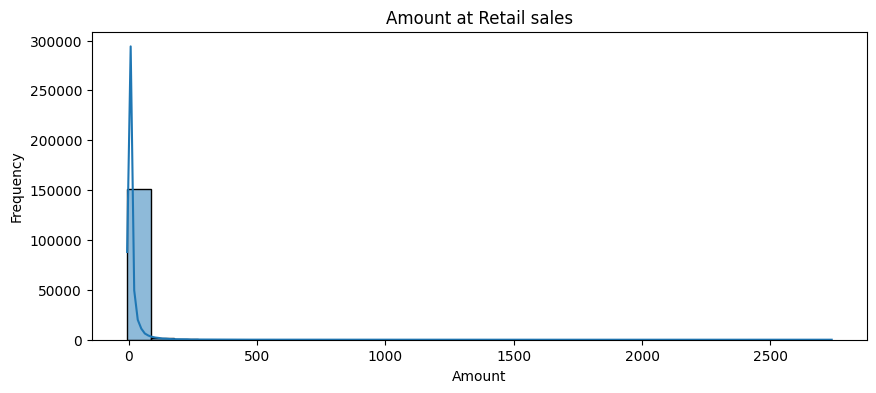

In [ ]:
#histogram#
plt.figure(figsize=(10, 4))
sns.histplot(df_sales["RETAIL SALES"], bins = 30 , kde = True)
plt.title("Amount at Retail sales")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show();

In [ ]:
numeric

Index(['YEAR', 'MONTH', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'], dtype='object')

In [ ]:
df_sales["RETAIL SALES"]

,RETAIL SALES
0,0.00
1,0.00
2,0.00
3,0.00
4,0.82
...,...
153512,2.35
153513,1.70
153514,0.00
153515,3.14


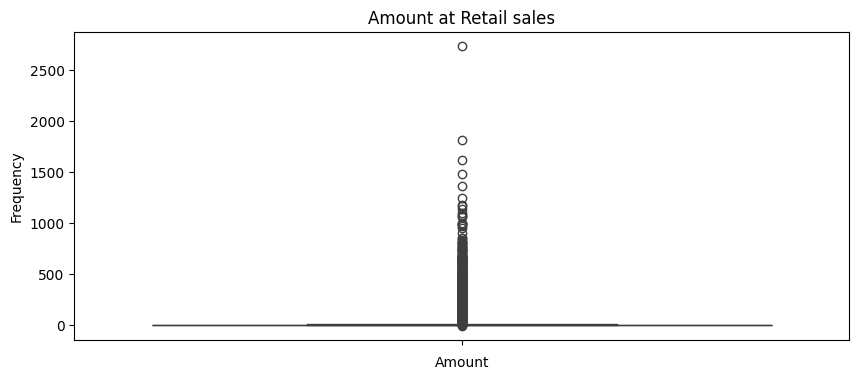

In [ ]:
#boxplot#
plt.figure(figsize=(10, 4))
sns.boxplot(df_sales["RETAIL SALES"])
plt.title("Amount at Retail sales")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show();

CATEGORICAL ANALYSES

In [ ]:
df_sales["SUPPLIER"]

,SUPPLIER
0,REPUBLIC NATIONAL DISTRIBUTING CO
1,PWSWN INC
2,RELIABLE CHURCHILL LLLP
3,LANTERNA DISTRIBUTORS INC
4,DIONYSOS IMPORTS INC
...,...
153512,NOVELTY MD INC
153513,BACARDI USA INC
153514,DESCHUTES BREWERY INC
153515,BACARDI USA INC


/tmp/ipython-input-3374095855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "MONTH" , data = df_sales , palette ="magma")


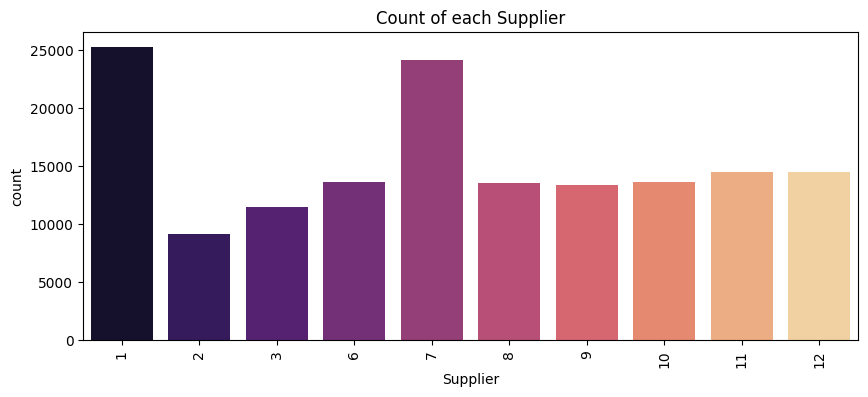

In [ ]:

plt.figure(figsize=(10, 4))
sns.countplot(x = "MONTH" , data = df_sales , palette ="magma")
plt.xlabel("Supplier")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.title("Count of each Supplier")
plt.show();

# **BIVARIATE** **ANALYSES**

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x = "MONTH" , data = df_sales , palette ="magma", hue="SUPPLIER", legend=False)
plt.xlabel("Supplier")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Count of each Supplier")
plt.show();

In [ ]:
df_sales["ITEM DESCRIPTION"]

,ITEM DESCRIPTION
0,BOOTLEG RED - 750ML
1,MOMENT DE PLAISIR - 750ML
2,S SMITH ORGANIC PEAR CIDER - 18.7OZ
3,SCHLINK HAUS KABINETT - 750ML
4,SANTORINI GAVALA WHITE - 750ML
...,...
153512,ANDONG SOJU - 375ML
153513,BACARDI ZOMBIE - 1.75L
153514,DESCHUTES FRESH SQUEEZED IPA 1/2 KEG
153515,BENEDICTINE DOM - 750ML


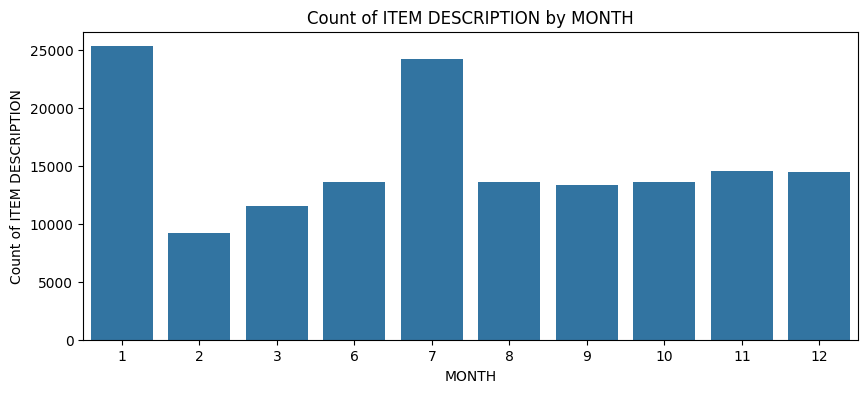

In [ ]:
#ITEM DESCRIPTION BY MONTH (Count of Items)#
item_count_by_month = df_sales.groupby("MONTH")["ITEM DESCRIPTION"].count()
plt.figure(figsize=(10, 4))
sns.barplot(x = item_count_by_month.index , y = item_count_by_month.values)
plt.xlabel("MONTH")
plt.ylabel("Count of ITEM DESCRIPTION")
plt.title("Count of ITEM DESCRIPTION by MONTH")
plt.xticks(rotation= 0)
plt.show();

In [ ]:
df_sales['ITEM DESCRIPTION'].value_counts()

,count
ITEM DESCRIPTION,
BURGANS ALBARINO - 750ML,21
LA VIELLE FERME CDV RED - 750ML,20
CA LUNGHETTA P/GRIG - 750ML,20
MARIETTA OV RED - 750ML,20
SANTA JULIA TORRONTES SUSTAINABLE - 750ML,20
...,...
BEGALI RECIOTO DELLA VAL - 500ML,1
MENDOZA STATION RES MAL - 750ML,1
BLACK ANKLE ROLLING HILLS RED BLEND - 750ML,1
